# Исследование объявлений о продаже квартир

**Описание проекта**

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Определим рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

 **Описание данных**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Изучение общей информации


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


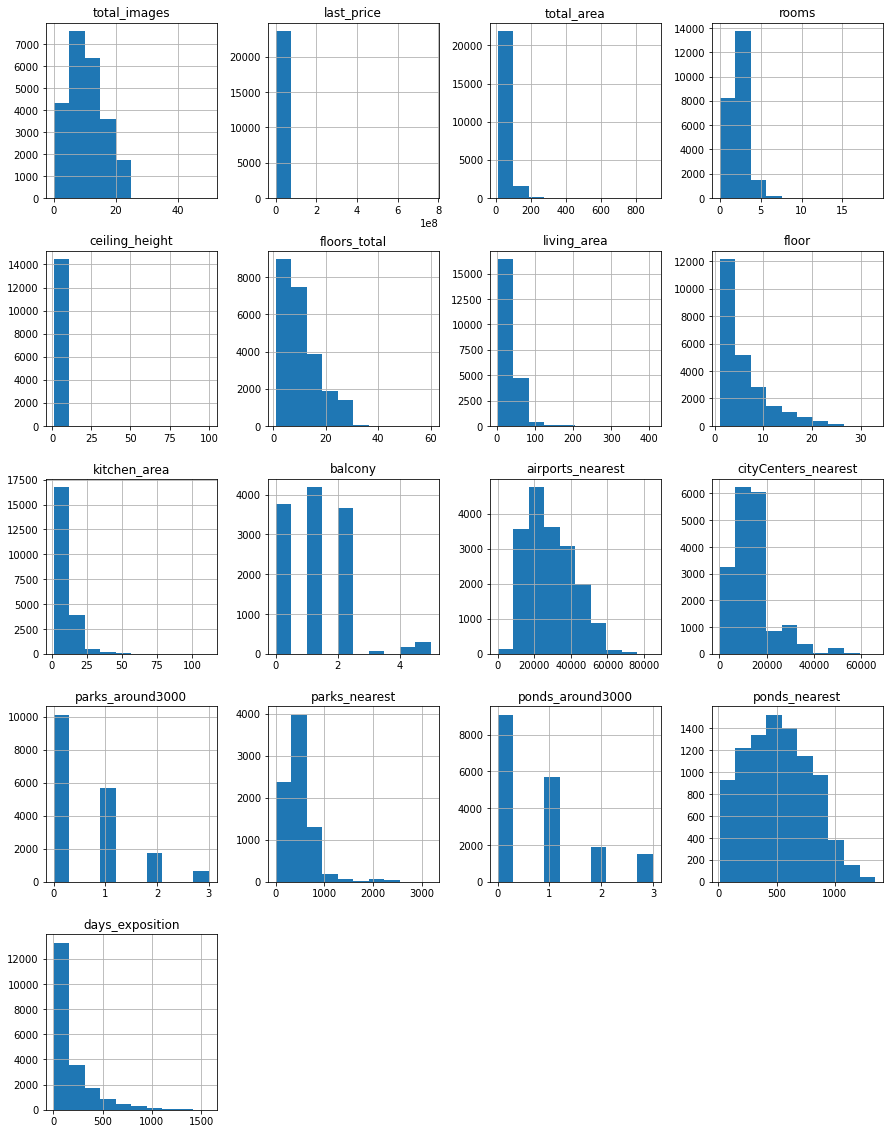

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.hist(figsize=(15, 20));

In [3]:
#смотрим, как выглядят данные
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


На первый взгляд наблюдаются пропуски и выбросы. Нужно смотреть пустые значения и искать аномалии.


## Предобработка данных

In [4]:
#смотрим, в каких столбцах есть пропуски

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Из-за могут быть **пропуски**? У людей балкон может отсутствовать.

is_apartment - тут люди просто не заполняли, так как не считали необходимым, потому что у них квартира. Если у кого-то апартаменты, они бы точно заполнили эти данные. Думаю, можно оставить пустые значения.

В 'cityCenters_nearest' могут быть пропуски, так как есть поселки и деревни. 

В 'days_exposition' пропуски из-за непроданных квартир.

В kitchen_area - у некоторых кухня может быть совмещена с гостиной. 

В ceiling_height люди не всегда могут знать высоту своих потолков, например


In [5]:
#заполним пропуски нулем

data['balcony'].fillna(0.0, inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#смотрим, какие значения есть 


data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [7]:
#в больших значениях может быть техническая ошибка. Делим все числа, равные или больше 20 на 10
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height'] / 10
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [8]:
#числа больше 3.2 приравниваем к медиане, так как чаще всего максимальная высота потолков не превышает 3.2 м

for row in data:
    data.loc[(data['ceiling_height'] > 3.2), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 2.77, 2.85, 2.64, 2.57, 2.71, 2.47,
       2.73, 2.84, 3.1 , 2.34, 3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58,
       2.52, 2.87, 2.66, 2.59, 2.  , 2.45, 2.92, 3.11, 3.13, 3.15, 3.16,
       3.12, 2.53, 2.74, 2.96, 2.46, 2.79, 2.95, 2.94, 2.83, 2.4 , 3.01,
       3.18, 2.3 , 2.48, 2.62, 2.82, 2.63, 2.88, 3.08, 3.07, 3.09, 2.81,
       2.97, 3.14, 2.68, 2.93, 1.2 , 2.98, 2.86, 3.17, 3.04, 3.02, 2.69,
       2.2 , 2.99, 2.91, 1.75, 2.25, 2.26, 2.89, 2.49, 1.  ])

In [9]:
#заменяем пустые значения на медиану

for row in data:
    data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
    
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
#удаляем аномально большие квартиры и оставила квартиры с площадью не больше 150 кв.м., чтобы не было выбросов

data = data[(data['living_area'] < 150) | (data['living_area'].isna())]
data['living_area'].describe()


count    21674.000000
mean        33.556692
std         18.116186
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        149.400000
Name: living_area, dtype: float64

In [11]:
#смотрим на квартиры меньше 9 кв.м.

data[data['living_area'] < 9]['living_area']



114      8.3
2309     8.4
3242     3.0
13915    2.0
16431    6.0
17248    8.9
17582    5.0
19251    6.5
20994    8.0
21505    8.5
21758    2.0
21943    5.4
23208    8.0
23574    3.0
Name: living_area, dtype: float64

In [12]:
#удаляем квартиры с площадью ниже 9 кв.м, так как 2 кв.м слишком мало

data = data[data['living_area'] > 9]
data['living_area'].describe()

count    21651.000000
mean        33.584765
std         18.105133
min          9.100000
25%         18.600000
50%         30.000000
75%         42.000000
max        149.400000
Name: living_area, dtype: float64

In [13]:
#рассчитаем коэффициент отношения площади кухни к площади квартиры, чтобы заменить пропуски

data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']


#заполним пропуски в кухонной площади, используя средний коэффициент

mean_kitchen_ratio = data['kitchen_ratio'].mean()
data['kitchen_area'].fillna(data['total_area'] * mean_kitchen_ratio, inplace=True)

#удаляем временные коэффициенты
data.drop(columns=['kitchen_ratio'], inplace=True)

data['kitchen_area'].describe()

count    21651.000000
mean        10.331908
std          5.501185
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        107.000000
Name: kitchen_area, dtype: float64

In [14]:
#минимальная площадь для кухни по нормативу 5 кв.м, поэтому удаляем кухни меньше 5 кв.м

data = data[data['kitchen_area'] > 5]
data['kitchen_area'].describe()

count    21002.000000
mean        10.506804
std          5.492508
min          5.016559
25%          7.100000
50%          9.200000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [15]:
#удаляем пропуски, их мало, и удаление особо не повлияет

data = data.dropna(subset=['locality_name'])
data = data.dropna(subset=['floors_total'])

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            18349
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4630
cityCenters_nearest      4612
parks_around3000         4611
parks_nearest           13696
ponds_around3000         4611
ponds_nearest           12854
days_exposition          2875
dtype: int64

In [16]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Мурино', 'Ивангород',
       'Сланцы', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'поселок Нов

In [17]:
#избавляемся от неявных дубликатов

data['locality_name'] = (
    data['locality_name']
   .str.replace('ё', 'е')
   .replace(['поселок Рябово', 'посёлок городского типа Рябово','поселок городского типа Рябово'], 'поселок Рябово', regex=True))

data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Мурино', 'Ивангород',
       'Сланцы', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'поселок Новый Свет', 'деревня

**Пропуски** в airports_nearest, parks_around3000, center_distance, parks_nearest, is_apartment, cityCenters_nearest не стала удалять, т.к. может быть потеря большого количества данных.
Пропуски days_exposition оставила как есть, это могут быть еще не проданные квартиры


In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            18349
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4630
cityCenters_nearest      4612
parks_around3000         4611
parks_nearest           13696
ponds_around3000         4611
ponds_nearest           12854
days_exposition          2875
dtype: int64

**Типы данных**

In [19]:
#преобразовываем first_day_exposition в datetime для извлечения дня недели в новом столбце

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])  
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20909 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20909 non-null  int64         
 1   last_price            20909 non-null  float64       
 2   total_area            20909 non-null  float64       
 3   first_day_exposition  20909 non-null  datetime64[ns]
 4   rooms                 20909 non-null  int64         
 5   ceiling_height        20909 non-null  float64       
 6   floors_total          20909 non-null  float64       
 7   living_area           20909 non-null  float64       
 8   floor                 20909 non-null  int64         
 9   is_apartment          2560 non-null   object        
 10  studio                20909 non-null  bool          
 11  open_plan             20909 non-null  bool          
 12  kitchen_area          20909 non-null  float64       
 13  balcony         

In [20]:
#меняем тип данных столбца на bool, так как тут ответы да/нет

data['is_apartment'] = data['is_apartment'].astype(bool)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20909 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20909 non-null  int64         
 1   last_price            20909 non-null  float64       
 2   total_area            20909 non-null  float64       
 3   first_day_exposition  20909 non-null  datetime64[ns]
 4   rooms                 20909 non-null  int64         
 5   ceiling_height        20909 non-null  float64       
 6   floors_total          20909 non-null  float64       
 7   living_area           20909 non-null  float64       
 8   floor                 20909 non-null  int64         
 9   is_apartment          20909 non-null  bool          
 10  studio                20909 non-null  bool          
 11  open_plan             20909 non-null  bool          
 12  kitchen_area          20909 non-null  float64       
 13  balcony         

In [21]:
#меняем тип данных в целые числа там, где вещественное число не подходит

data[['last_price', 'floors_total']] = data[['last_price', 'floors_total']].astype(int)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20909 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20909 non-null  int64         
 1   last_price            20909 non-null  int64         
 2   total_area            20909 non-null  float64       
 3   first_day_exposition  20909 non-null  datetime64[ns]
 4   rooms                 20909 non-null  int64         
 5   ceiling_height        20909 non-null  float64       
 6   floors_total          20909 non-null  int64         
 7   living_area           20909 non-null  float64       
 8   floor                 20909 non-null  int64         
 9   is_apartment          20909 non-null  bool          
 10  studio                20909 non-null  bool          
 11  open_plan             20909 non-null  bool          
 12  kitchen_area          20909 non-null  float64       
 13  balcony         

## Добавление в таблицу новых столбцов

In [22]:
#цена одного квадратного метра 

data['one_square_meter'] = (data['last_price'] / data['total_area']).round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,True,...,0.0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79


In [23]:
#день недели публикации объявления

data['day_of_week'] = data['first_day_exposition'].dt.day_name()
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter,day_of_week
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,Thursday
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,Tuesday
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,Thursday
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,Tuesday
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,Monday
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,Thursday
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.76,Wednesday
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,Sunday
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,True,...,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.25,Thursday
11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,75000.00,Monday


In [24]:
#месяц публикации объявления

data['month_of_exposition'] = data['first_day_exposition'].dt.month
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter,day_of_week,month_of_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,Thursday,3
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,Tuesday,12
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,Thursday,8
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,Tuesday,6
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,Monday,9
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,Thursday,11
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.76,Wednesday,5
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,Sunday,2
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,True,...,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.25,Thursday,11
11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,75000.00,Monday,8


In [25]:
#год публикации объявления

data['year_of_exposition'] = data['first_day_exposition'].dt.year
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter,day_of_week,month_of_exposition,year_of_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,Thursday,3,2019
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,Tuesday,12,2018
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,Thursday,8,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,Tuesday,6,2018
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,Monday,9,2018
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,Thursday,11,2017
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,NaN,NaN,NaN,NaN,NaN,189.0,87454.76,Wednesday,5,2018
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,Sunday,2,2017
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,True,...,13878.0,1.0,310.0,2.0,553.0,137.0,127525.25,Thursday,11,2017
11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,51677.0,0.0,NaN,0.0,NaN,7.0,75000.00,Monday,8,2018


In [26]:
data['floor'].unique()

array([ 8,  1,  4, 13,  5,  6, 26,  7,  3,  2, 11, 15,  9, 18, 22, 10, 19,
       20, 27, 25, 17, 14, 12, 21, 28, 24, 16, 23, 30, 29, 32, 33, 31])

In [27]:
#добавляем столбец "тип этажа квартиры" (значения — «первый», «последний», «другой»)

def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    
    return 'другой'
data['type_floor'] = data.apply(type_floor, axis=1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter,day_of_week,month_of_exposition,year_of_exposition,type_floor
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,1.0,482.0,2.0,755.0,NaN,120370.37,Thursday,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,0.0,NaN,0.0,NaN,81.0,82920.79,Tuesday,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,1.0,90.0,2.0,574.0,558.0,92785.71,Thursday,8,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,2.0,112.0,1.0,48.0,121.0,100000.00,Tuesday,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,NaN,NaN,NaN,NaN,55.0,95065.79,Monday,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,0.0,NaN,0.0,NaN,155.0,99195.71,Thursday,11,2017,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,NaN,NaN,NaN,NaN,189.0,87454.76,Wednesday,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,0.0,NaN,0.0,NaN,289.0,88524.59,Sunday,2,2017,другой
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,True,...,1.0,310.0,2.0,553.0,137.0,127525.25,Thursday,11,2017,другой
11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,0.0,NaN,0.0,NaN,7.0,75000.00,Monday,8,2018,другой


In [28]:
#добавляем столбец - расстояние до центра города в километрах
data['center_distance'] = (data['cityCenters_nearest']/1000).round(0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter,day_of_week,month_of_exposition,year_of_exposition,type_floor,center_distance
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,Thursday,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,Tuesday,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,Thursday,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,Tuesday,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,True,...,NaN,NaN,NaN,55.0,95065.79,Monday,9,2018,другой,NaN


##  Исследовательский анализ данных

### Поиск и обработка аномалий


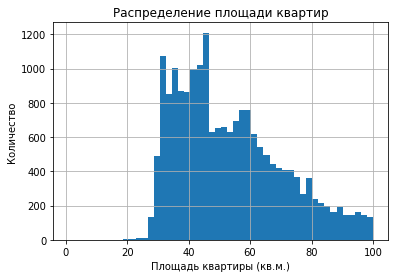

In [29]:

data['total_area'].hist(range = (1, 100), bins=50)
plt.title('Распределение площади квартир')
plt.xlabel('Площадь квартиры (кв.м.)')
plt.ylabel('Количество')

# Показ гистограммы
plt.show()


Наиболее популярны квартиры с площадью 30-45 кв.м

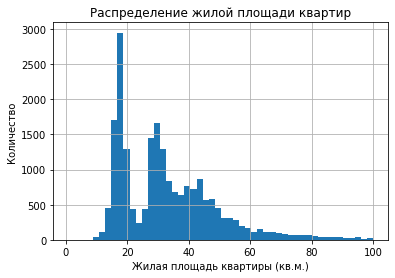

In [30]:
data['living_area'].hist(range = (1, 100), bins=50)
plt.title('Распределение жилой площади квартир')
plt.xlabel('Жилая площадь квартиры (кв.м.)')
plt.ylabel('Количество')

# Показ гистограммы
plt.show()




Больше всего квартир c жилой площадью 20 кв.м. Скорее всего это студии

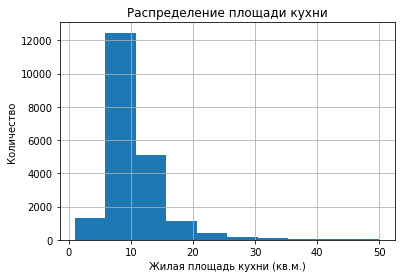

In [31]:
data['kitchen_area'].hist(range = (1, 50), bins=10)
plt.title('Распределение площади кухни')
plt.xlabel('Жилая площадь кухни (кв.м.)')
plt.ylabel('Количество')

# Показ гистограммы
plt.show()

Площадь кухни часто не превышает 10 кв.м

In [32]:
#убираем аномально большие цены и оставляем от 30 млн

data = data.query('last_price < 30000000')

In [33]:
data['last_price'].describe()

count    2.069800e+04
mean     5.765650e+06
std      3.888826e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.690000e+06
75%      6.700000e+06
max      2.999900e+07
Name: last_price, dtype: float64

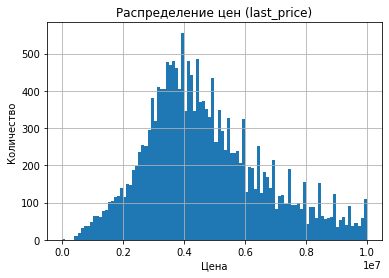

In [34]:
#преобразовываем тип данных

data['last_price'] = data['last_price'].astype(int)
data['last_price'].hist(range = (1, 10000000), bins=100)

plt.title('Распределение цен (last_price)')
plt.xlabel('Цена')
plt.ylabel('Количество')

# Показ гистограммы
plt.show()


4 млн - наиболее часто встречающаяся стоимость квартиры.
Предпологаю, что это квартиры с площадью как раз-таки ~30 кв.м

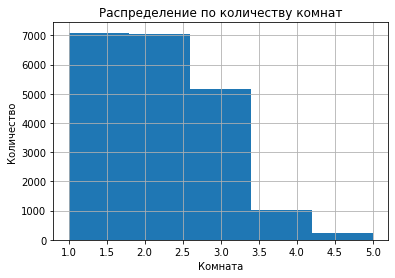

In [35]:
data['rooms'].hist(range = (1, 5), bins=5)
plt.title('Распределение по количеству комнат')
plt.xlabel('Комната')
plt.ylabel('Количество')

# Показ гистограммы
plt.show()

Однокомнатных и двухкомнатных квартир почти равное количество. Квартир с 5 комнатами меньше 500


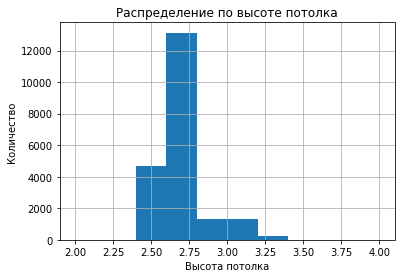

In [36]:
data['ceiling_height'].hist(range = (2, 4), bins=10)
plt.title('Распределение по высоте потолка')
plt.xlabel('Высота потолка')
plt.ylabel('Количество')

# Показ гистограммы
plt.show()

Преобладает высота потолков 2,75

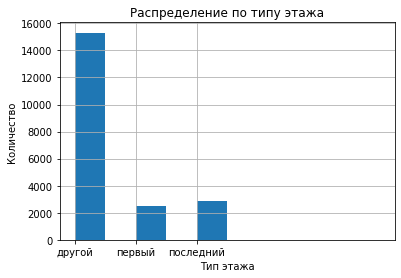

In [37]:
data['type_floor'].hist(range = (0, 5), bins= 10)
plt.title('Распределение по типу этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Количество')

# Показ гистограммы
plt.show()

In [38]:
data['type_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

Больше всего квартир в категории "другой"

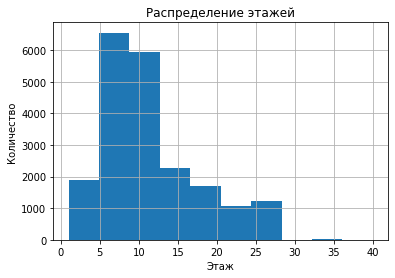

In [39]:
data['floors_total'].hist(range = (1, 40), bins=10)
plt.title('Распределение этажей')
plt.xlabel('Этаж')
plt.ylabel('Количество')

# Показ гистограммы
plt.show()

Преобладают количество домов с этажами 5-12.


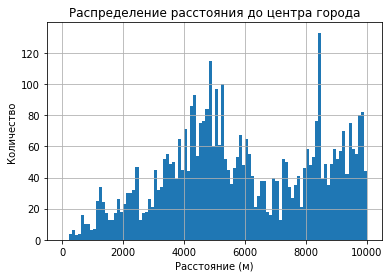

In [40]:
data['cityCenters_nearest'].hist(range = (1, 10000), bins=100)
plt.title('Распределение расстояния до центра города')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество')

# Показ гистограммы
plt.show()

Выбросы есть. Но нужно иметь ввиду, что тут не только город, а поселки и деревни

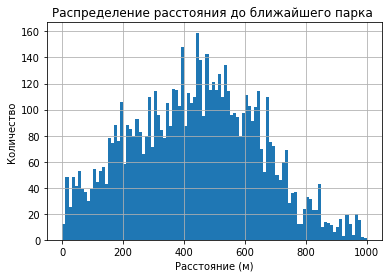

In [41]:
data['parks_nearest'].hist(range = (1, 1000), bins=100)
plt.title('Распределение расстояния до ближайшего парка ')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество')

# Показ гистограммы
plt.show()

В среднем 400-500 м от центра.

### Как быстро продавались квартиры?

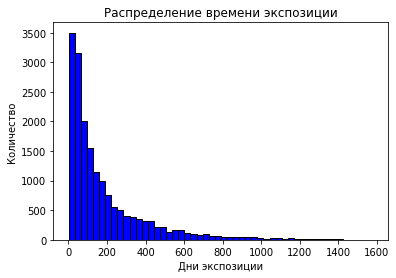

In [42]:
#Считаем, как быстро продавались квартиры.
data['days_exposition'].hist(bins=50, grid=False, color='blue', edgecolor='black')

# Настройка заголовков и меток осей
plt.title('Распределение времени экспозиции')
plt.xlabel('Дни экспозиции')
plt.ylabel('Количество')

# Показ гистограммы
plt.show()

In [43]:
mean_days = data['days_exposition'].mean()
median_days = data['days_exposition'].median()

print(f"Среднее время экспозиции: {mean_days}")
print(f"Медиана времени экспозиции: {median_days}")

Среднее время экспозиции: 183.80582741457414
Медиана времени экспозиции: 101.0


 Быстрое время продажи - до 100 дней. Медиана как раз-таки указывает на это. Думаю, Необычно долгая продажа квартиры - от 400 дней и больше.


### Определим факторы, которые больше всего влияют на стоимость объекта


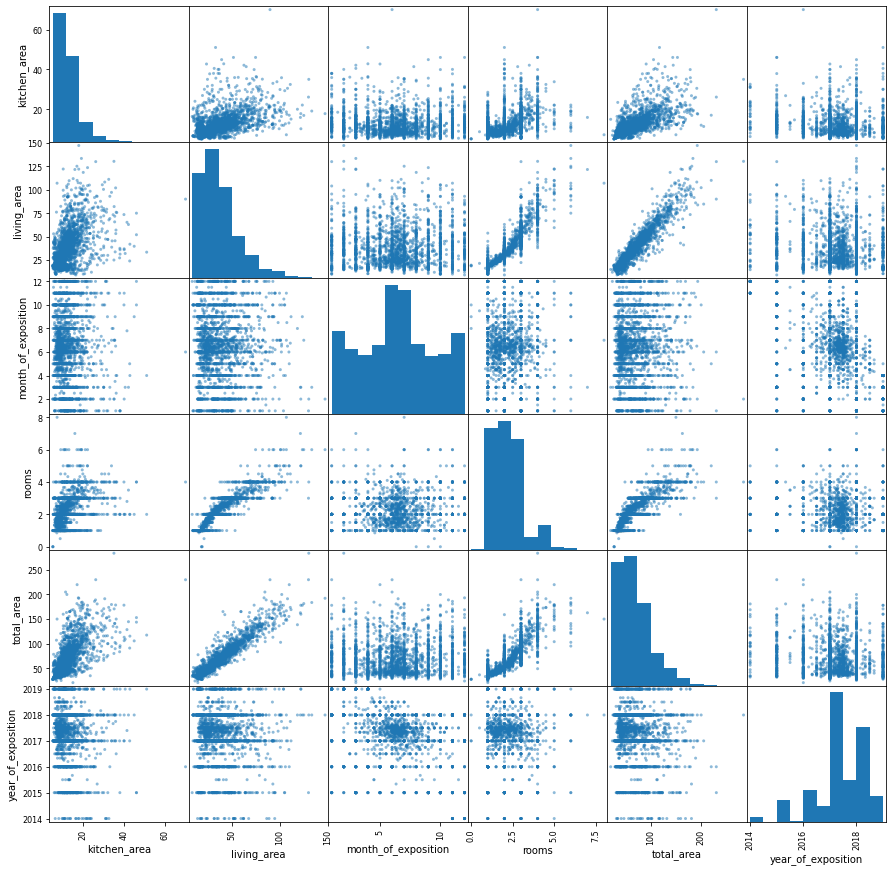

In [44]:
#строим матрицу диаграмм рассеяния, чтобы найти корреляцию двух величин

good_data = data.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area', 'rooms', 'month_of_exposition', 'year_of_exposition' ], aggfunc='mean')
pd.plotting.scatter_matrix(good_data, figsize = (15,15));



In [45]:
good_data.corr()

,kitchen_area,living_area,month_of_exposition,rooms,total_area,year_of_exposition
kitchen_area,1.000000,0.485147,-0.033625,0.415812,0.663843,-0.109695
living_area,0.485147,1.000000,0.002514,0.907271,0.939890,-0.072839
month_of_exposition,-0.033625,0.002514,1.000000,0.016000,0.000618,-0.274534
rooms,0.415812,0.907271,0.016000,1.000000,0.846506,-0.054210
total_area,0.663843,0.939890,0.000618,0.846506,1.000000,-0.110850
year_of_exposition,-0.109695,-0.072839,-0.274534,-0.054210,-0.110850,1.000000


In [46]:
#по отдельности смотрим корреляцию - зависимость цены и общей площади и т.д.

data['last_price'].corr(data['total_area'])

0.7897202080966129

In [47]:
data['last_price'].corr(data['living_area'])

0.6808284842423694

In [48]:
data['last_price'].corr(data['kitchen_area'])

0.6086680914107154

In [49]:
data['last_price'].corr(data['rooms'])

0.5125473231052713

In [50]:
#расчитываем медианы цены для каждой категории

type_floor_median = data.groupby('type_floor')['last_price'].median()
day_of_week_median = data.groupby('day_of_week')['last_price'].median()
month_of_exposition_median = data.groupby('month_of_exposition')['last_price'].median()
year_of_exposition_median = data.groupby('year_of_exposition')['last_price'].median()

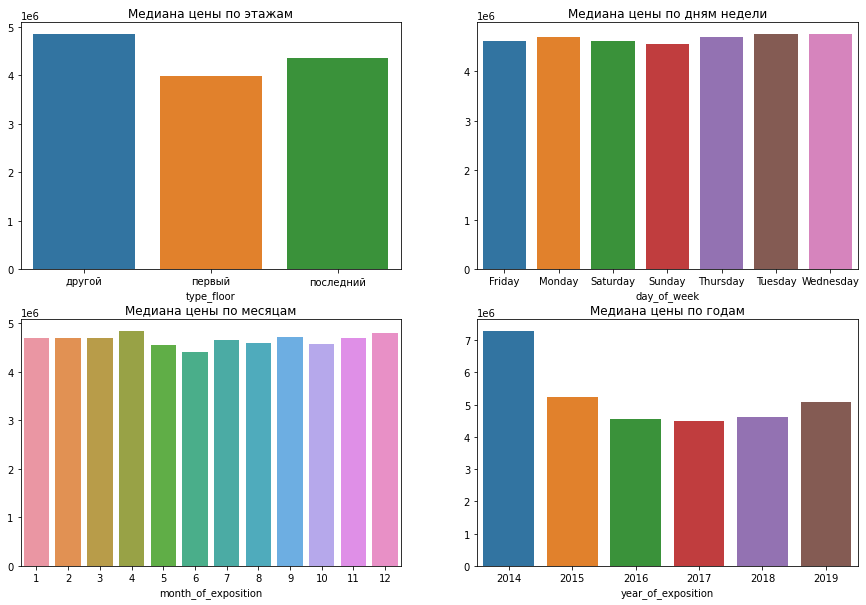

In [51]:
#cтроим barplot для каждой категории

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x=type_floor_median.index, y=type_floor_median.values, ax=axes[0, 0])
axes[0, 0].set_title('Медиана цены по этажам')

sns.barplot(x=day_of_week_median.index, y=day_of_week_median.values, ax=axes[0, 1])
axes[0, 1].set_title('Медиана цены по дням недели')

sns.barplot(x=month_of_exposition_median.index, y=month_of_exposition_median.values, ax=axes[1, 0])
axes[1, 0].set_title('Медиана цены по месяцам')

sns.barplot(x=year_of_exposition_median.index, y=year_of_exposition_median.values, ax=axes[1, 1])
axes[1, 1].set_title('Медиана цены по годам')



plt.show()



 Вывод:  Наблюдается положительная корреляция между стоимостью и площадью квартиры. Также цена зависит сильно от количества комнат.
        Квартиры на "другом" этаже продавались дороже: первый этаж продается в среднем за меньшую стоимость, чем другие категории этажей.
        Возможно, дело в том, что первый этаж неудобен для многих: большая проходимость, опасность протечки канализации при засоре, например.
        Квартиры в будние продается чуть дороже, чем в выходные и перед ними.
        В апреле самый пик продаж по высокой цене в году. 
        В 2014 году квариты были намного дороже, чем в дальнейшие годы: цены снизились примерно на 40% в 2017 году.

###  Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [52]:
#считаем количество объявлений для каждого населенного пункта

announcements = data['locality_name'].value_counts().reset_index()
announcements.columns = ['locality_name', 'count']
announcements

,locality_name,count
0,Санкт-Петербург,13922
1,поселок Мурино,441
2,поселок Шушары,389
3,Всеволожск,366
4,Колпино,317
...,...,...
305,деревня Котлы,1
306,деревня Ям-Тесово,1
307,поселок Кирпичное,1
308,поселок Барышево,1


In [53]:
#населенные пункты с наибольшим кол-вом объявлений

top_10_localities = announcements.head(10)
top_10_localities

,locality_name,count
0,Санкт-Петербург,13922
1,поселок Мурино,441
2,поселок Шушары,389
3,Всеволожск,366
4,Колпино,317
5,Пушкин,315
6,поселок Парголово,299
7,Гатчина,265
8,деревня Кудрово,238
9,Петергоф,192


In [54]:
#подсчёт средней цены за квадратный метр для каждого населённого пункта

avg_price_square_meter = data.groupby('locality_name')['living_area'].mean().reset_index()
avg_price_square_meter.columns = ['locality_name', 'avg_price_square_meter']
avg_price_square_meter

,locality_name,avg_price_square_meter
0,Бокситогорск,31.940000
1,Волосово,28.339706
2,Волхов,31.841778
3,Всеволожск,30.974208
4,Выборг,34.609222
...,...,...
305,село Путилово,29.300000
306,село Рождествено,25.233333
307,село Русско-Высоцкое,25.637500
308,село Старая Ладога,15.800000


In [55]:
#объединение данных о количестве объявлений и средней цене за квадратный метр

top_10_summary = pd.merge(top_10_localities, avg_price_square_meter, on='locality_name')
top_10_summary

,locality_name,count,avg_price_square_meter
0,Санкт-Петербург,13922,35.203555
1,поселок Мурино,441,23.355147
2,поселок Шушары,389,29.240463
3,Всеволожск,366,30.974208
4,Колпино,317,31.597224
5,Пушкин,315,34.357651
6,поселок Парголово,299,25.035753
7,Гатчина,265,30.063019
8,деревня Кудрово,238,24.310042
9,Петергоф,192,30.536146


In [56]:
#сортировка по средней цене по убыванию
top_10_summary = top_10_summary.sort_values(by='avg_price_square_meter', ascending=False)
top_10_summary

,locality_name,count,avg_price_square_meter
0,Санкт-Петербург,13922,35.203555
5,Пушкин,315,34.357651
4,Колпино,317,31.597224
3,Всеволожск,366,30.974208
9,Петергоф,192,30.536146
7,Гатчина,265,30.063019
2,поселок Шушары,389,29.240463
6,поселок Парголово,299,25.035753
8,деревня Кудрово,238,24.310042
1,поселок Мурино,441,23.355147


In [57]:
#населенные пункты с самой высокой и низкой ценой за квадратный метр

highest_price_locality = top_10_summary.iloc[0]['locality_name']
lowest_price_locality = top_10_summary.iloc[-1]['locality_name']
print(f"Населённый пункт с самой высокой стоимостью квадратного метра: {highest_price_locality}")
print(f"Населённый пункт с самой низкой стоимостью квадратного метра: {lowest_price_locality}")

Населённый пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург
Населённый пункт с самой низкой стоимостью квадратного метра: поселок Мурино


**Вывод**: в Санкт-Петербурге самая высокая средняя цена одного кв метра. На 10 месте поселок Мурино с самой низкой ценой в нашем топ-10.

### Зависимость стоимости объектов от расстояния до центра города

In [58]:
#Фильтруем, выделяем только отдельный город

spb_apartments = data[data['locality_name'] == 'Санкт-Петербург']
spb_apartments

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter,day_of_week,month_of_exposition,year_of_exposition,type_floor,center_distance
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,Thursday,3,2019,другой,16.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,Thursday,8,2015,другой,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,Tuesday,6,2018,другой,8.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.6,7,True,...,NaN,0.0,NaN,289.0,88524.59,Sunday,2,2017,другой,15.0
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.3,3,True,...,310.0,2.0,553.0,137.0,127525.25,Thursday,11,2017,другой,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.0,12,True,...,NaN,0.0,NaN,23.0,91089.11,Monday,4,2019,другой,14.0
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,True,...,353.0,2.0,652.0,29.0,100566.57,Wednesday,2,2018,другой,16.0
23690,3,5500000,52.00,2018-07-19,2,2.65,5,31.0,2,True,...,300.0,0.0,NaN,15.0,105769.23,Thursday,7,2018,другой,6.0
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,True,...,NaN,1.0,806.0,519.0,129903.98,Thursday,10,2016,другой,4.0


In [59]:
# вычисляем среднюю стоимость для каждого километра

avg_price_per_km = spb_apartments.groupby('center_distance')['last_price'].mean()
avg_price_per_km

center_distance
0.0     1.137538e+07
1.0     1.149888e+07
2.0     1.108596e+07
3.0     9.631745e+06
4.0     1.019159e+07
5.0     1.059958e+07
6.0     9.599987e+06
7.0     9.116322e+06
8.0     8.852843e+06
9.0     6.831921e+06
10.0    6.235197e+06
11.0    6.142534e+06
12.0    5.879961e+06
13.0    6.093028e+06
14.0    5.550961e+06
15.0    5.840728e+06
16.0    5.346458e+06
17.0    5.300888e+06
18.0    5.056460e+06
19.0    5.143102e+06
20.0    6.054931e+06
21.0    5.152163e+06
22.0    5.267889e+06
23.0    4.682107e+06
24.0    3.899364e+06
25.0    4.187834e+06
26.0    4.052789e+06
27.0    8.300000e+06
28.0    5.026429e+06
29.0    4.236667e+06
Name: last_price, dtype: float64

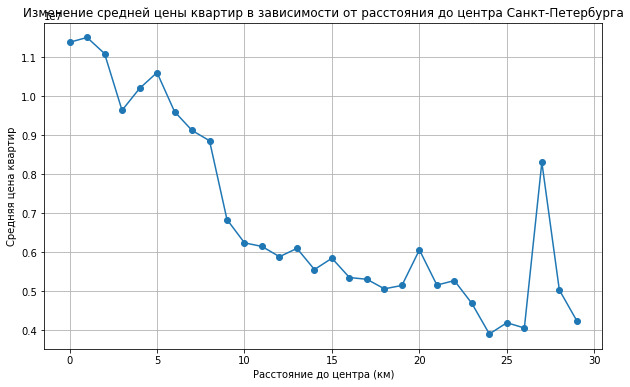

In [60]:
# строим график

plt.figure(figsize=(10, 6))
plt.plot(avg_price_per_km.index, avg_price_per_km.values, marker='o')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена квартир')
plt.title('Изменение средней цены квартир в зависимости от расстояния до центра Санкт-Петербурга')
plt.grid(True)
plt.show()

# Общий вывод

В данных было найдено много пропусков и аномалий: некоторые были удалены ( (если удаление не искажает данные), некоторые заменены на медиану. В нескольких столбцах не стала удалять пропуски, так как их наличие не мешало в анализе. 
Аномальные значения в ceiling_height обработаны: слишком высокие потолки заменены медианой, потолки выше 25 метров разделены на 10 (возможно техническая ошибка). Срезала слишком дорогие квартиры, чтобы не было выбросов.

Типы данных изменены там, где это нужно: например, даты, стоимость, количество этажей. 
Устранены неявные дубликаты в названиях населённых пунктов.

Быстрое время продажи - до 100 дней. Думаю, необычно долгая продажа квартиры - от 400 дней и больше. Также есть еще много квартир, которые продавались очень долго или до сих пор стоят на продаже. Большое количество квартир было продано за 1-2 месяца.

Площадь квартиры, жилой площади и кухни напрямую влияет на стоимость квартиры ( от 0,6 - 0,7). Немаловажным фактором является количество комнат, что так же влияет на цену (0,5). Дороже всего продавались квартиры в 2014 году, в 2017 году медианная цена снизилась до 40%. Столбчатые диаграмма показали зависимость от типа этажа, дня недели, месяца и года. 

Средняя цена за квадратный метр ожидаемо выше в Санкт-Петербурге, так как в городе более развитая инфраструктура, социальные места, образование и прочее. Цена за квадратный мест составила 35.203555. Самая низкая цена из топ-10 в поселке Мурино (23.355147). В пригороде, поселках меньше удобств, людей, также меньше школ, магазинов. Следовательно, цена ниже.

Квартиры в центре года имеют более высокую стоимость ввиду того, что инфраструктура в центре больше развита и больше развлечений, культурных центров. По мере удаления от центра цена снижается. В поселках и пригородах может быть еще меньше удобств. График показал сильную зависимость цены от расстояния до центра. 

